In [ ]:
!pip install graph-tiger

     |████████████████████████████████| 12.7 MB 19.7 MB/s 
     |████████████████████████████████| 15.8 MB 49.8 MB/s 
     |████████████████████████████████| 1.4 MB 56.6 MB/s 
     |████████████████████████████████| 76 kB 5.7 MB/s 
     |████████████████████████████████| 830 kB 60.7 MB/s 
     |████████████████████████████████| 133 kB 70.4 MB/s 
     |████████████████████████████████| 822 kB 66.4 MB/s 
     |████████████████████████████████| 802 kB 69.6 MB/s 
     |████████████████████████████████| 802 kB 57.1 MB/s 
     |████████████████████████████████| 793 kB 51.8 MB/s 
     |████████████████████████████████| 793 kB 15.4 MB/s 
     |████████████████████████████████| 791 kB 57.3 MB/s 
     |████████████████████████████████| 786 kB 43.3 MB/s 
     |████████████████████████████████| 779 kB 56.3 MB/s 
     |████████████████████████████████| 778 kB 52.0 MB/s 
     |████████████████████████████████| 776 kB 43.9 MB/s 
     |████████████████████████████████| 769 kB 43.8 MB/s 
     |████████

In [ ]:
!pip install wheel
!pip install pipwin

!pipwin install numpy
!pipwin install pandas
!pipwin install shapely
!pipwin install gdal
!pipwin install fiona
!pipwin install pyproj
!pipwin install six
!pipwin install rtree
!pipwin install geopandas
!pip install osmnx

     |████████████████████████████████| 97 kB 5.4 MB/s 
     |████████████████████████████████| 1.0 MB 58.7 MB/s 
  Created wheel for pipwin: filename=pipwin-0.5.1-py2.py3-none-any.whl size=8791 sha256=39ea886c61e43de4ed3a23637cbc167a5a44a86e8c6c53791c462241b69ff2fe
  Stored in directory: /root/.cache/pip/wheels/4e/f2/06/9024048eece9a22afc7a013395d6de2d345f56185095550d4c
  Created wheel for pyjsparser: filename=pyjsparser-2.7.1-py3-none-any.whl size=26000 sha256=67c5d31d33ef9d7d310785ad4803579237975be9b824e099bfa0dc831b1bdb20
  Stored in directory: /root/.cache/pip/wheels/2a/80/ac/dcd2bdbd03dd2b7b7e2bf3e5afbda6a1ab7935bbce314969da
Successfully built pipwin pyjsparser
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
/usr/local/lib/python3.7/dist-packages/pipwin/command.py:66: UserWarning: Found a non Windows system. Package installation might not work.
 

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv('locations_geo.csv', header=0)
df.dtypes

stop_lat           float64
stop_lon           float64
name_code_merge     object
dtype: object

In [ ]:
stops_od = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.stop_lon.values, df.stop_lat.values), crs='WGS84').drop(["stop_lat", "stop_lon"], axis=1)
stops_od.to_crs(crs='EPSG:3395', inplace=True)
stops_od
# stops_od.to_pickle('locations_geo.pkl')stops_od.to_crs(crs='EPSG:3395', inplace=True)

,name_code_merge,geometry
0,Metalowców-12525,POINT (1887615.119 6611710.157)
1,Dyrekcyjna-21101,POINT (1896019.069 6604720.011)
2,Wrocławski Park Przemysłowy-12102,POINT (1891789.201 6607949.577)
3,PL. GRUNWALDZKI-20923,POINT (1899484.270 6607882.734)
4,Bagatela-23724,POINT (1900230.277 6614964.081)
...,...,...
2281,Gospodarska-24729,POINT (1906097.481 6609003.547)
2282,Grabowa-38104,POINT (1883660.401 6612777.686)
2283,Hala Stulecia-42533,POINT (1900583.747 6607021.787)
2284,Piwnika - Ponurego-29513,POINT (1904802.479 6614494.575)


In [ ]:
stops_od.plot()

In [ ]:
xs = []
ys = []
for row in stops_od.iterrows():
  xs.append(row[1].geometry.xy[0].tolist()[0])
  ys.append(row[1].geometry.xy[1].tolist()[0])
stops_od['x'] = xs
stops_od['y'] = ys
stops_od.drop(['geometry'], axis=1, inplace=True)
stops_od

,name_code_merge,x,y
0,Metalowców-12525,1.887615e+06,6.611710e+06
1,Dyrekcyjna-21101,1.896019e+06,6.604720e+06
2,Wrocławski Park Przemysłowy-12102,1.891789e+06,6.607950e+06
3,PL. GRUNWALDZKI-20923,1.899484e+06,6.607883e+06
4,Bagatela-23724,1.900230e+06,6.614964e+06
...,...,...,...
2281,Gospodarska-24729,1.906097e+06,6.609004e+06
2282,Grabowa-38104,1.883660e+06,6.612778e+06
2283,Hala Stulecia-42533,1.900584e+06,6.607022e+06
2284,Piwnika - Ponurego-29513,1.904802e+06,6.614495e+06


In [ ]:
stops_od.to_csv('locations_xy.csv', index=False)

In [ ]:
print(stops_od.iloc[0].geometry.xy)

(array('d', [1887615.1190748187]), array('d', [6611710.157062867]))


In [ ]:
!pip install momepy

     |████████████████████████████████| 243 kB 9.8 MB/s 
     |████████████████████████████████| 2.4 MB 39.5 MB/s 
     |████████████████████████████████| 2.1 MB 32.5 MB/s 


<AxesSubplot:>

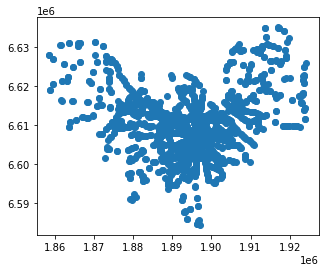

In [ ]:
stops_od.plot()